#############################
### File Name: Disney Movies Trend and Profit
### Name: Thip Rattanavilay
### Project 1
### Date: 9/24/2021
#############################

# Disney Movies Trend and Profit

### Import

In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 5)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import os

In [2]:
cwd = os.getcwd()

print("Current working directory:", cwd)

Current working directory: /Users/timrattanavilay/Documents/DSC_Class/DSC680/Project01/WEEK4


#data are located in my director

In [3]:
disney_path = 'disney_movies_total_gross_clean.csv'
disney_data = pd.read_csv(disney_path)

#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames
#it's important to highlight that in 2015 and 2019 
#The Walt Disney Company Reports

In [4]:
url1 = 'disney_revenue_stream2016_2019.csv'
df1 = pd.read_csv(url1)

#disney_corporation_revenue_1991-2016.csv
#this dataframe contains movie+tv_network+Parks_Resorts+consumer_product_sales+interactive+videogames

In [5]:
url2 = 'disney_revenue_1991-2016.csv'
df2 =pd.read_csv(url2)

# Analysing and Processing the dataset

In [6]:
disney_data.head()

,movie_title,release_date,...,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,12/21/1937,...,184925485,5228953251
1,Pinocchio,2/9/1940,...,84300000,2188229052
2,Fantasia,11/13/1940,...,83320000,2187090808
3,Song of the South,11/12/1946,...,65000000,1078510579
4,Cinderella,2/15/1950,...,85000000,920608730


In [7]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [8]:
## Converting release_date to date type:
disney_data['release_date'] = pd.to_datetime(disney_data['release_date'])

In [9]:
# Let's create an column named year to visualize later
disney_data['year'] = disney_data['release_date'].dt.date.astype(str).str.split('-', expand=True)[0]

In [10]:
disney_data.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
mpaa_rating                         object
total_gross                          int64
inflation_adjusted_gross             int64
year                                object
dtype: object

In [11]:
disney_data.describe().T

,count,mean,...,75%,max
total_gross,579.0,6.470179e+07,...,75709033.0,9.366622e+08
inflation_adjusted_gross,579.0,1.187625e+08,...,119202000.0,5.228953e+09


# Top 10 Movies at the box office

In [12]:
gross = disney_data.sort_values('inflation_adjusted_gross', ascending=False)

# Display the top 10 movies 
gross.head(10)

,movie_title,release_date,...,inflation_adjusted_gross,year
0,Snow White and the Seven Dwarfs,1937-12-21,...,5228953251,1937
1,Pinocchio,1940-02-09,...,2188229052,1940
2,Fantasia,1940-11-13,...,2187090808,1940
8,101 Dalmatians,1961-01-25,...,1362870985,1961
6,Lady and the Tramp,1955-06-22,...,1236035515,1955
3,Song of the South,1946-11-12,...,1078510579,1946
564,Star Wars Ep. VII: The Force Awakens,2015-12-18,...,936662225,2015
4,Cinderella,1950-02-15,...,920608730,1950
13,The Jungle Book,1967-10-18,...,789612346,1967
179,The Lion King,1994-06-15,...,761640898,1994


# Top 10 Movie genre trend

In [13]:
gross['release_year'] = gross['release_date'].dt.year

# Compute mean of adjusted gross per genre and per year
group = gross.groupby(['genre', 'release_year']).mean()

# Convert the GroupBy object to a DataFrame
genre_yearly = group.reset_index()

# Inspect genre_yearly 
genre_yearly.head(10)

,genre,release_year,total_gross,inflation_adjusted_gross
0,Action,1981,0.0,0.0
1,Action,1982,26918576.0,77184895.0
2,Action,1988,17577696.0,36053517.0
3,Action,1990,59249588.5,118358772.0
4,Action,1991,28924936.5,57918572.5
5,Action,1992,29028000.0,58965304.0
6,Action,1993,21943553.5,44682157.0
7,Action,1994,19180582.0,39545796.0
8,Action,1995,63037553.5,122162426.5
9,Action,1996,135281096.0,257755262.5


# Genre popularity trend

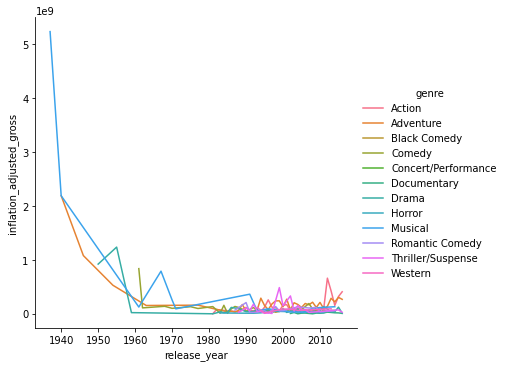

In [14]:
import seaborn as sns

# Plot the data  
sns.relplot(x='release_year', y='inflation_adjusted_gross', kind='line', hue='genre', data=genre_yearly);

# The best and worst gross:

In [15]:

print('the best total gross', disney_data['total_gross'].max(),
      '\nThe worse total gross:', disney_data['total_gross'].min())

the best total gross 936662225 
The worse total gross: 0


In [16]:
print('the best inflation adjusted gross', disney_data['inflation_adjusted_gross'].max(),
      '\n The worse inflation_adjusted_gross:', disney_data['inflation_adjusted_gross'].min())

the best inflation adjusted gross 5228953251 
 The worse inflation_adjusted_gross: 0


# What are the movies ratings and genres?

Text(0.5, 0, 'rating')

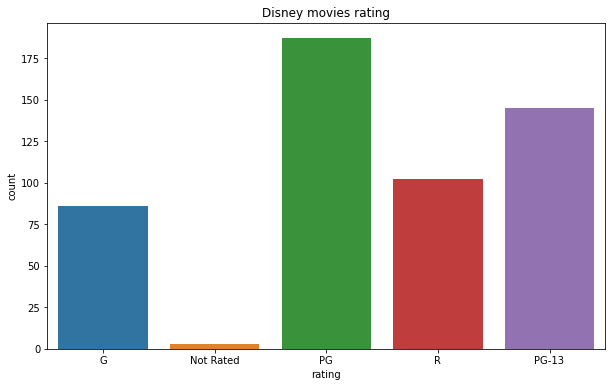

In [17]:
plt.figure(figsize=(10, 6))
plt.title('Disney movies rating')
sns.countplot(x='mpaa_rating', data=disney_data)
plt.xlabel('rating')

<AxesSubplot:title={'center':'Disney movies genres'}, xlabel='count', ylabel='genre'>

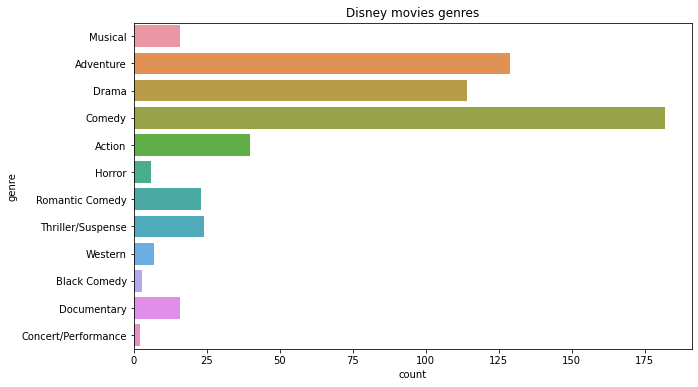

In [18]:
plt.figure(figsize=(10, 6))
plt.title('Disney movies genres')
sns.countplot(y='genre', data=disney_data)

# Analysing number per year:

<AxesSubplot:title={'center':'Disney movies per year'}, xlabel='year', ylabel='Count'>

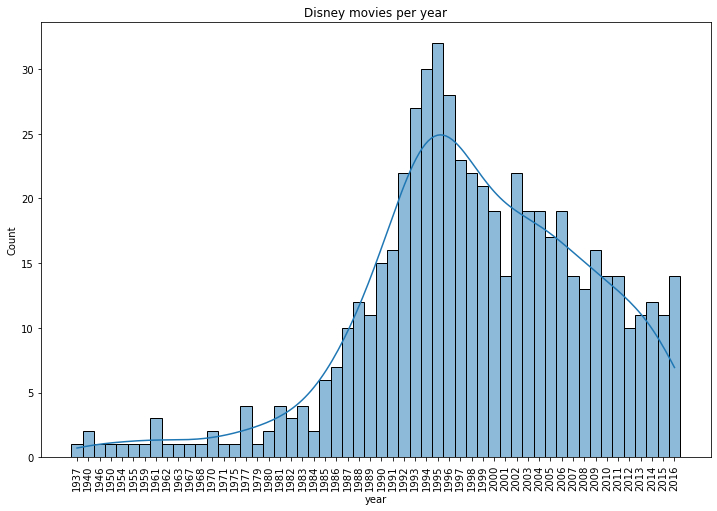

In [19]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('Disney movies per year')
sns.histplot(disney_data['year'], kde=True)

# Analysing the gross:

<AxesSubplot:title={'center':'Evolution of movies gross with time'}, xlabel='release date', ylabel='total gross'>

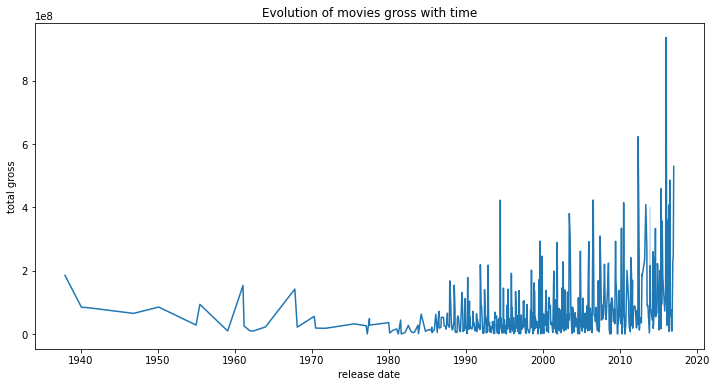

In [20]:
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time')
plt.xlabel('release date')
plt.ylabel('total gross')
sns.lineplot(x='release_date', y='total_gross', data=disney_data)

<AxesSubplot:title={'center':'Evolution of movies gross with time adjusted by inflation'}, xlabel='release date', ylabel='inflation adjusted gross'>

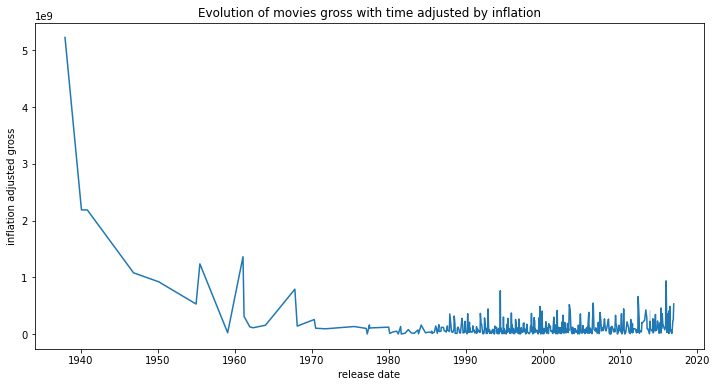

In [21]:
plt.figure(figsize=(12, 6))
plt.title('Evolution of movies gross with time adjusted by inflation')
plt.xlabel('release date')
plt.ylabel('inflation adjusted gross')
sns.lineplot(x='release_date', y='inflation_adjusted_gross', data=disney_data)

# Analysing movie genres:

# Have disney movies income decreased?

In [23]:
year_income = disney_data.groupby('year').sum()

<AxesSubplot:title={'center':'disney movies income'}, xlabel='year', ylabel='income'>

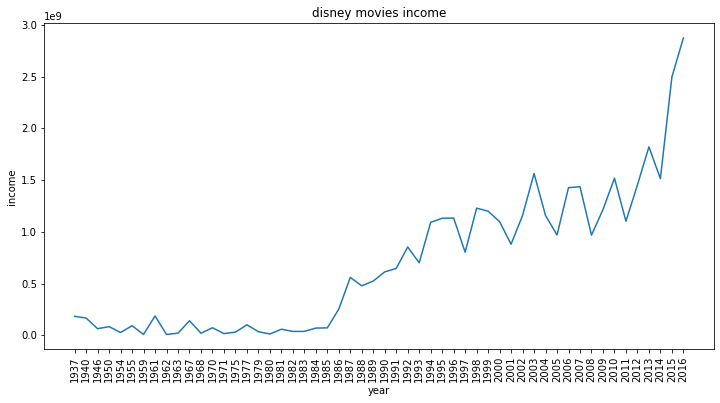

In [24]:
plt.figure(figsize=(12, 6))
plt.title('disney movies income')
plt.xlabel('year')
plt.ylabel('income')
plt.xticks(rotation=90)
sns.lineplot(x=year_income.index, y=year_income['total_gross'])

<AxesSubplot:title={'center':'disney movies income adjusted'}, xlabel='year', ylabel='inflation adjusted income'>

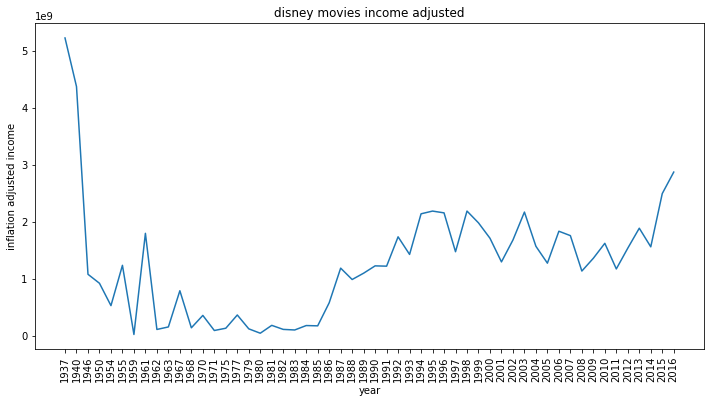

In [25]:
plt.figure(figsize=(12, 6))
plt.title('disney movies income adjusted')
plt.xlabel('year')
plt.ylabel('inflation adjusted income')
plt.xticks(rotation=90)
sns.lineplot(x=year_income.index, y=year_income['inflation_adjusted_gross'])

In [26]:
#getting some information to understand 
#what kind of data cleaning operations 
#I need to do

print('df1 info')
print(df1.info())
print('df2 info')
print(df2.info())


print('df1 head')
print(df1.head())
print('df2 head')
print(df2.head())

df1 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10 non-null     object 
 1   2016        5 non-null      float64
 2   2017        5 non-null      float64
 3   2018        5 non-null      float64
 4   2019        6 non-null      float64
dtypes: float64(4), object(1)
memory usage: 528.0+ bytes
None
df2 info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             26 non-null     int64  
 1   Studio Entertainment[NI 1]       25 non-null     float64
 2   Disney Consumer Products[NI 2]   24 non-null     float64
 3   Disney Interactive[NI 3][Rev 1]  12 non-null     float64
 4   Walt Disney Parks and Resorts    26 non-null     floa

In [27]:
#after an inspection we saw that we had to strip a comma 
#I discovered that 1996 value for Disney Media Network has a strange behaviour
#I changed manually but this is not the best way to change a value

df2['Disney Media Networks'][df2['Year']==1996]=4142

<ipython-input-27-20df6e307288>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Disney Media Networks'][df2['Year']==1996]=4142


In [28]:
#I am changing to float type the Disney Media Network Column
df2['Disney Media Networks']= df2['Disney Media Networks'].replace(',', '')
df2['Disney Media Networks']= df2['Disney Media Networks'].astype(float)
print("1996  Park and media info")
print(df2[["Walt Disney Parks and Resorts", 'Disney Media Networks']][df2['Year']==1996])
print(df2[["Walt Disney Parks and Resorts", 'Disney Media Networks']][df2['Year']==1996].info())
print(type(df2['Disney Media Networks'][df2['Year']==1996].values))
print(df2['Disney Media Networks'][df2['Year']==1996])
#This way summing all the not a number values 
#I can check if everything is numerical
#If sum=0 I got only numbers
print(df2['Disney Media Networks'].isna().sum())
print(df2)

1996  Park and media info
   Walt Disney Parks and Resorts  Disney Media Networks
5                         4502.0                 4142.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 5 to 5
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Walt Disney Parks and Resorts  1 non-null      float64
 1   Disney Media Networks          1 non-null      float64
dtypes: float64(2)
memory usage: 24.0 bytes
None
<class 'numpy.ndarray'>
5    4142.0
Name: Disney Media Networks, dtype: float64
3
    Year  Studio Entertainment[NI 1]  ...  Disney Media Networks  Total
0   1991                      2593.0  ...                    NaN   6111
1   1992                      3115.0  ...                    NaN   7502
2   1993                      3673.4  ...                    NaN   8529
3   1994                      4793.0  ...                  359.0  10414
4   1995                      6

In [29]:
#we have to fill the Nan with 0

df1=df1.fillna(0)
df2=df2.fillna(0)

#df1 and df2 had different format
#in one case years were columns 
#and revenes streams rows
#in the other dataframe this order was swapped

#then we have to transpose the dataframe
df1_t=df1.T
df2_t=df2.T
print(df2_t.head())

print('Df1 Transpose Head')
print(df1_t)
print(df1_t.values[1:])

print('Df2 Transpose Head')
print(df2_t.head())

                                     0       1   ...       24       25
Year                             1991.0  1992.0  ...   2015.0   2016.0
Studio Entertainment[NI 1]       2593.0  3115.0  ...   7366.0   9441.0
Disney Consumer Products[NI 2]    724.0  1081.0  ...   4499.0      0.0
Disney Interactive[NI 3][Rev 1]     0.0     0.0  ...   1174.0      0.0
Walt Disney Parks and Resorts    2794.0  3306.0  ...  16162.0  16974.0

[5 rows x 26 columns]
Df1 Transpose Head
                                     0                               1  ...  \
Unnamed: 0  Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...   
2016                            9441.0                             0.0  ...   
2017                            8379.0                             0.0  ...   
2018                            9987.0                             0.0  ...   
2019                           11127.0                             0.0  ...   

                      8        9  
Unnamed: 0  Eliminatio

In [30]:
#we create a new dataframe in order to clean the old one
new_index=df1.columns[1:].astype(int)
print(new_index)
new_columns=df1.iloc[:,0]
print(new_columns)
df_1_restored=pd.DataFrame(data=df1_t.values[1:],index=new_index,columns=new_columns)
df_1_restored = df_1_restored.rename_axis(index='Year',columns='Revenue Stream')
print(df_1_restored)

Int64Index([2016, 2017, 2018, 2019], dtype='int64')
0               Studio Entertainment[NI 1]
1           Disney Consumer Products[NI 2]
2          Disney Interactive[NI 3][Rev 1]
3    Consumer Products & Interactive Media
4            Walt Disney Parks and Resorts
5          Parks, Experiences and Products
6                    Disney Media Networks
7       Direct-to-Consumer & International
8                              Elimination
9                                    Total
Name: Unnamed: 0, dtype: object
Revenue Stream Studio Entertainment[NI 1] Disney Consumer Products[NI 2]  ...  \
Year                                                                      ...   
2016                               9441.0                            0.0  ...   
2017                               8379.0                            0.0  ...   
2018                               9987.0                            0.0  ...   
2019                              11127.0                            0.0  ...   


In [31]:
new_columns=df2.iloc[:,1:].columns
new_index=df2.iloc[:-1,0]

new_values=df2.values[:-1,1:]
print("Printing new values")
print(new_values)
print(len(new_values))
print(new_values.shape)
print("New Columns Shape")
print(new_columns.shape)
print("new_index shape")
print(new_index.shape)
df_2_restored=pd.DataFrame(data=new_values,columns=new_columns,index=new_index)
print("Printing Df2 Restored head and info")
print(df_2_restored.tail())
print(df_2_restored.info())

Printing new values
[[ 2593.    724.      0.   2794.      0.   6111. ]
 [ 3115.   1081.      0.   3306.      0.   7502. ]
 [ 3673.4  1415.1     0.   3440.7     0.   8529. ]
 [ 4793.   1798.2     0.   3463.6   359.  10414. ]
 [ 6001.5  2150.      0.   3959.8   414.  12525. ]
 [    0.      0.      0.   4502.   4142.  18739. ]
 [ 6981.   3782.    174.   5014.   6522.  22473. ]
 [ 6849.   3193.    260.   5532.   7142.  22976. ]
 [ 6548.   3030.    206.   6106.   7512.  23402. ]
 [ 5994.   2602.    368.   6803.   9615.  25402. ]
 [ 7004.   2590.      0.   6009.   9569.  25790. ]
 [ 6465.   2440.      0.   6691.   9733.  25360. ]
 [ 7364.   2344.      0.   6412.  10941.  27061. ]
 [ 8713.   2511.      0.   7750.  11778.  30752. ]
 [ 7587.   2127.      0.   9023.  13207.  31944. ]
 [ 7529.   2193.      0.   9925.  14368.  34285. ]
 [ 7491.   2347.      0.  10626.  15046.  35510. ]
 [ 7348.   2415.    719.  11504.  15857.  37843. ]
 [ 6136.   2425.    712.  10667.  16209.  36149. ]
 [ 6701.   

In [32]:
#I converted to numeric all the elements of the restored df
df_2_restored=df_2_restored.apply(lambda x: pd.to_numeric(x,errors="coerce") if x.dtype == "object" else x)
print(df_2_restored.head(7))
print(df_2_restored.tail())
print(df_2_restored.info())
print("We want to understand why Disney Media Networks is not a number and then change with 0")
print("Filtering the object")
df2_filter=df_2_restored[df_2_restored["Disney Media Networks"].isnull()]
print(df2_filter)
df_2_restored=df_2_restored.fillna(0)
print("Df2 Restored Info")
print(df_2_restored.info())
#we do the same with df_1_restored
df_1_restored=df_1_restored.apply(lambda x: pd.to_numeric(x,errors="coerce") if x.dtype == "object" else x)
df_1_restored=df_1_restored.fillna(0)
#understanding df_1_restored and df_2_restored index datatype
print(type(df_1_restored.index))
print(df_1_restored.index.dtype)
print(type(df_2_restored.index))
print(df_2_restored.index.dtype)

      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
1991                      2593.0                           724.0  ...   
1992                      3115.0                          1081.0  ...   
1993                      3673.4                          1415.1  ...   
1994                      4793.0                          1798.2  ...   
1995                      6001.5                          2150.0  ...   
1996                         0.0                             0.0  ...   
1997                      6981.0                          3782.0  ...   

      Disney Media Networks    Total  
Year                                  
1991                    0.0   6111.0  
1992                    0.0   7502.0  
1993                    0.0   8529.0  
1994                  359.0  10414.0  
1995                  414.0  12525.0  
1996                 4142.0  18739.0  
1997                 6522.0  2

In [33]:
#
#I merged the two dataframe one with the data.world data
#and the other with the The Walt Disney Company Report Data (2017 2019)
#
df_merge=df_1_restored.merge(df_2_restored, how='outer',right_index=True,left_index=True)
print(df_merge.info())
print(df_merge.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1991 to 2019
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Studio Entertainment[NI 1]_x           4 non-null      float64
 1   Disney Consumer Products[NI 2]_x       4 non-null      float64
 2   Disney Interactive[NI 3][Rev 1]_x      4 non-null      float64
 3   Consumer Products & Interactive Media  4 non-null      float64
 4   Walt Disney Parks and Resorts_x        4 non-null      float64
 5   Parks, Experiences and Products        4 non-null      float64
 6   Disney Media Networks_x                4 non-null      float64
 7   Direct-to-Consumer & International     4 non-null      float64
 8   Elimination                            4 non-null      float64
 9   Total_x                                4 non-null      float64
 10  Studio Entertainment[NI 1]_y           25 non-null     float64
 11  Dis

In [34]:
#sorting by index 
#otherwise the sequence will follow 
#the merge order 2017-18-19->1991,92 [...]
df_merge_2=pd.concat([df_1_restored,df_2_restored]).sort_index()

print(df_merge_2.tail(12))
print(df_merge_2.info())

      Studio Entertainment[NI 1]  Disney Consumer Products[NI 2]  ...  \
Year                                                              ...   
2008                      7348.0                          2415.0  ...   
2009                      6136.0                          2425.0  ...   
2010                      6701.0                          2678.0  ...   
2011                      6351.0                          3049.0  ...   
2012                      5825.0                          3252.0  ...   
2013                      5979.0                          3555.0  ...   
2014                      7278.0                          3985.0  ...   
2015                      7366.0                          4499.0  ...   
2016                      9441.0                             0.0  ...   
2017                      8379.0                             0.0  ...   
2018                      9987.0                             0.0  ...   
2019                     11127.0                   

In [35]:
#x1,x2,x3 are revenues threshold
#that I use for better data viz
#20 Billions
x1=20000
#40 Billions
x2=40000
#60 Billions
x3=60000
#I want to segment data for "revenues intervals"
#but some years the had a decrease in revenues
#so I used two logic condition
#one based on revenue thresholds 
#one based on years intervals
b1=df_merge_2['Total'][df_merge_2['Total']<x1]
b2=df_merge_2['Total'][(df_merge_2.index>max(b1.index))&(df_merge_2['Total']<x2)]
b3=df_merge_2['Total'][(df_merge_2.index>max(b2.index))& (df_merge_2['Total']<x3)]
b4=df_merge_2['Total'][df_merge_2['Total']>=x3]
#checking if everything is ok
print(b1.head(3))
print(b2.head(3))
print("B3")
print(b3.head(3))
print(b4.head(3))
print(b1.tail(3))
print("b2 tail")
print(b2.tail(3))
print("B3 tail")
print(b3.tail(3))
print(b4.tail(3))

Year
1991    6111.0
1992    7502.0
1993    8529.0
Name: Total, dtype: float64
Year
1997    22473.0
1998    22976.0
1999    23402.0
Name: Total, dtype: float64
B3
Year
2011    40893.0
2012    42278.0
2013    45041.0
Name: Total, dtype: float64
Year
2019    69570.0
Name: Total, dtype: float64
Year
1994    10414.0
1995    12525.0
1996    18739.0
Name: Total, dtype: float64
b2 tail
Year
2008    37843.0
2009    36149.0
2010    38063.0
Name: Total, dtype: float64
B3 tail
Year
2016    55632.0
2017    55137.0
2018    59434.0
Name: Total, dtype: float64
Year
2019    69570.0
Name: Total, dtype: float64


[1991 1992 1993 1994 1995 1996]
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]
[2011 2012 2013 2014 2015 2016 2017 2018]
[2019]
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


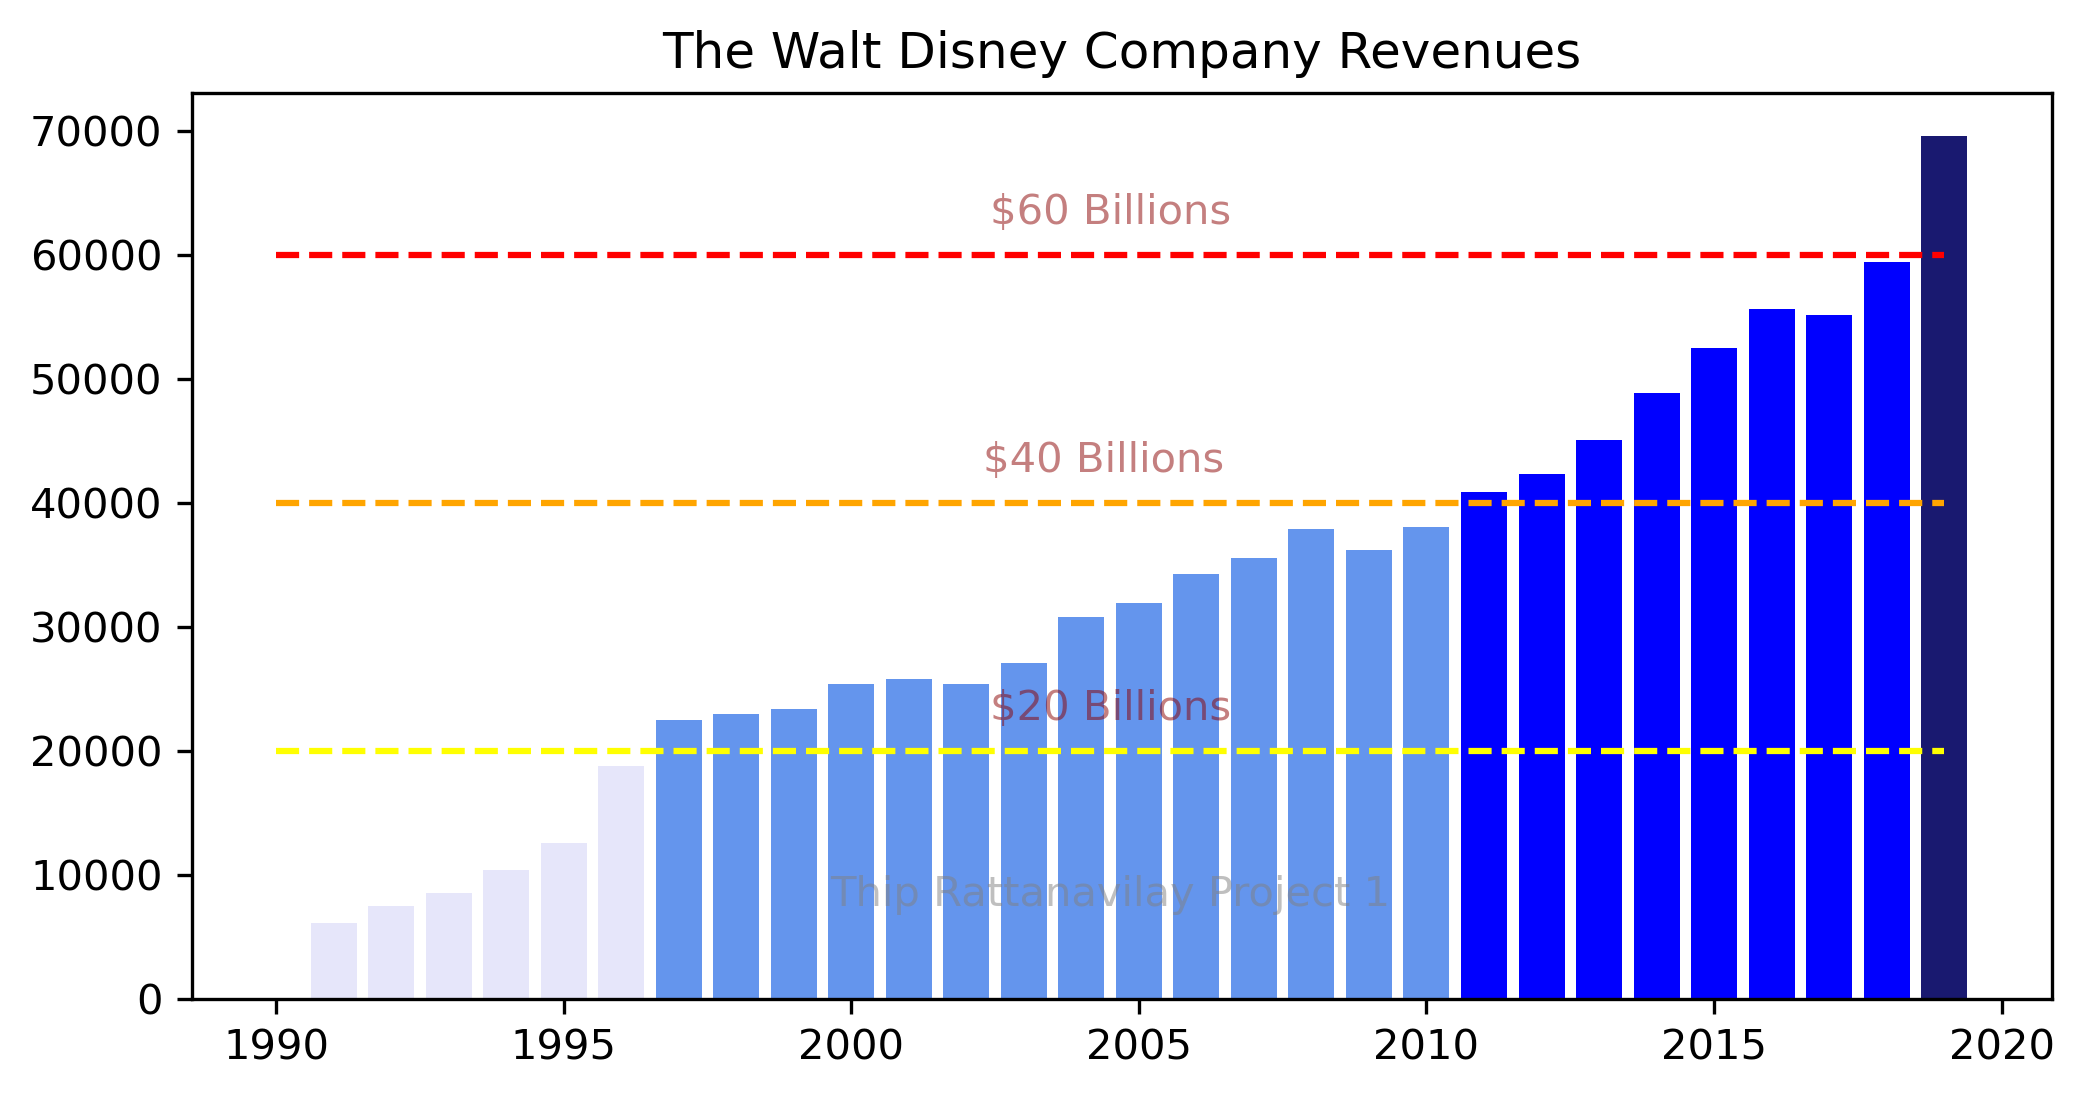

In [36]:
#getting x ticks position for our plot
b1x=np.arange(b1.index[0],b1.index[-1]+1)
b2x=np.arange(b2.index[0],b2.index[-1]+1)
b3x=np.arange(b3.index[0],b3.index[-1]+1)
b4x=np.arange(b4.index[0],b4.index[-1]+1)
y_range=np.arange(1990,2020)
print(b1x)
print(b2x)
print(b3x)
print(b4x)
y1=np.full(len(y_range),x1)
y2=np.full(len(y_range),x2)
y3=np.full(len(y_range),x3)
print(y_range)
#plot section
fig,ax=plt.subplots(figsize=(8,4),
                          facecolor='white', dpi=300)
#b1 b2 b3 b4 contains the total revenues
#divided by revenue range
#b1<20 $ billion
#20<b2<40 $ billion
#40<b3<60 $ billion
#60<b4 $ billion
ax.bar(b1x,b1,color="lavender")
ax.bar(b2x,b2,color="cornflowerblue")
ax.bar(b3x,b3,color="blue")
ax.bar(b4x,b4,color="midnightblue")

ax.plot(y_range,y1,'--',color="yellow")
ax.plot(y_range,y2,'--',color="orange")
ax.plot(y_range,y3,'--',color="red")
ax.set_title("The Walt Disney Company Revenues")
water_x=(min(y_range)+max(y_range))/2
water_y=max(y2)/4
plt.text(water_x, water_y, 'Thip Rattanavilay Project 1',
          fontsize=10, color='gray',
          ha='center', va='top', alpha=0.5)

plt.text(water_x, x1+5000, '$20 Billions',
          fontsize=10, color='darkred',
          ha='center', va='top', alpha=0.5)
plt.text(water_x, x2+5000, '$40 Billions ',
          fontsize=10, color='darkred',
          ha='center', va='top', alpha=0.5)
plt.text(water_x, x3+5000, '$60 Billions',
          fontsize=10, color='darkred',
          ha='center', va='top', alpha=0.5)

plt.show()
